## An experimentation of Object Detection technologies

Just testing out a few trending and SOTA models on object and face detection to understand them. This will enable me to get useful insights on their use cases then implement optimal model for my problem.

In [1]:
import torch
import torchvision
from matplotlib import pyplot as plt
import numpy as np
from ultralytics import YOLO
import cv2

In [11]:
# load a pretrained YOLO v8 model from ultralytics
model = YOLO('yolov8n.pt') # 'yolov8n.yaml' for new model from scratch
model2 = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT)

In [12]:
IMAGES_TO_TRAIN = "/home/ashmitbhattarai/Codes/face_detection_model_family/data/images"
labels = ["samjhu"]
number_images = 20

## Collecting Training and Val Data

In [ ]:
import time
import os
from uuid import uuid1

# if cam:
#     cam.release()
#     cv2.destroyAllWindows()
cam = cv2.VideoCapture(0)
if (cam.isOpened() == False): 
    print("Error reading video file")
    cam.release()
    cv2.destroyAllWindows()
else:
    try:
        for label in labels:
            print (f"capturing Images for {label}")
            time.sleep(5)
            for i in range(number_images):
                ret, frame = cam.read()
                imagename = str(uuid1())+".jpg"
                file_folder = os.path.join(IMAGES_TO_TRAIN,label)

                filepath = os.path.join(file_folder,imagename)
                print (filepath,f"writing file for {label}",i)
                cv2.imshow("Data Capture",frame)
                cv2.imwrite(filepath,frame)
                time.sleep(5)

        cam.release()
        cv2.destroyAllWindows()
    except Exception as e:
        print (e)
        cam.release()
        cv2.destroyAllWindows()



In [ ]:
# model.model # to display the architechture of the model itself
# results = model(url/path of the iamge)
# results.print()

# Printing the evaluated image
#plt.imsshow(np.squeeze(results.render())) # np.squeeze here actually remove outer 1 dim array and 
# plt.show()

### the read coding begins here
#### testing the camera using different models
cam = cv2.VideoCapture(0)

while cam.isOpened():
    ret, frame = cam.read()
    results = model(frame)
    cv2.imshow("YOLO",np.squeeze(results[0].plot()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()

cv2.destroyAllWindows()


## Train the model

In [ ]:
# labelling images
# https://labelstud.io/guide/get_started.html#Quick-start
# pip install label-studio
# training the Yolov8 model
dataset_yaml = "../dataset.yaml"
model.train(data=dataset_yaml,epochs=50,batch=8,imgsz=320,workers=1) # workers is causing bit of a problem in Pytorch now

## Load Custom model

In [2]:
new_model = YOLO('/home/ashmitbhattarai/Codes/face_detection_model_family/notebooks/runs/detect/train4/weights/last.pt')

In [ ]:
cam = cv2.VideoCapture(0)

while cam.isOpened():
    ret, frame = cam.read()
    results = model(frame)
    cv2.imshow("YOLO",np.squeeze(results[0].plot()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()

cv2.destroyAllWindows()


image 1/1 /home/ashmitbhattarai/Codes/face_detection_model_family/data/images/train/images/0301fcd2-40c65232-05ed-11ee-93ea-4851c5e7243a.jpg: 256x320 1 ashmit', 1 samjhu, 1 ramesh, 58.7ms
Speed: 15.4ms preprocess, 58.7ms inference, 6.4ms postprocess per image at shape (1, 3, 320, 320)


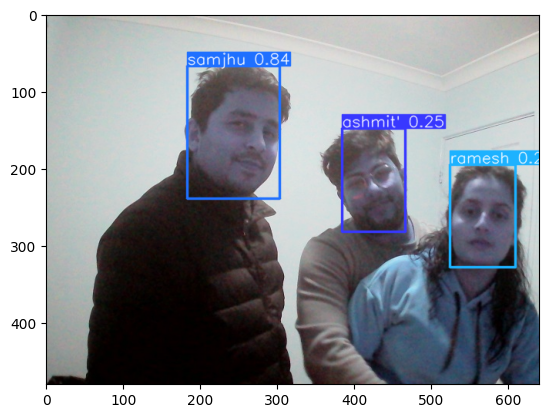

In [5]:
%matplotlib inline
result = new_model('/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/train/images/0301fcd2-40c65232-05ed-11ee-93ea-4851c5e7243a.jpg')
# print (result[0])
plt.imshow(np.squeeze(result[0].plot()))
plt.show()